Importing Libraries (it's a ritual now)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering

# To ignore all warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [325]:
df = pd.read_pickle("C:/Users/LENOVO/Desktop/Javin Programming/machine learning files/Cohort/Capstone Project/Models & Dataset/df.pkl")

print("✅ Dataframes imported successfully")

✅ Dataframes imported successfully


In [326]:
df

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers,supervisor,obs_consequence,age_group
0,37,Female,United States,No,Yes,Often,Small,No,Yes,Not sure,No,Yes,Yes,Easy,No,Yes,Yes,No,36-45
2,32,Male,Canada,No,No,Rarely,Small,No,No,No,No,No,Don't know,Difficult,No,Yes,Yes,No,26-35
3,31,Male,United Kingdom,Yes,Yes,Often,Medium,No,No,Yes,No,No,No,Difficult,Yes,Yes,No,Yes,26-35
4,31,Male,United States,No,No,Never,Medium,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,Yes,Yes,No,26-35
5,33,Male,United States,Yes,No,Sometimes,Small,No,Yes,Not sure,No,Don't know,Don't know,Don't know,No,Yes,Yes,No,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,29,Male,United States,Yes,Yes,Sometimes,Medium,Yes,Yes,Yes,Yes,No,Yes,Don't know,Yes,Yes,No,No,26-35
1254,26,Male,United Kingdom,No,Yes,Unknown,Medium,No,No,No,No,No,Don't know,Easy,No,Yes,Yes,No,26-35
1255,32,Male,United States,Yes,Yes,Often,Medium,Yes,Yes,Yes,No,No,Yes,Difficult,No,Yes,Yes,No,26-35
1256,34,Male,United States,Yes,Yes,Sometimes,Large,No,Yes,Yes,No,No,Don't know,Difficult,Yes,No,No,No,26-35


The columns `no_employees` and `Country` were highly imbalanced, so the results would have been partial to one side. 


The featur `Gender` does not much contribute, the work environment conditions are well enough captured by other questions asked in the survey.

`age_group` is a better measure than taking numerical `Age`

Other features removed seemed to be repetitive and their essence has been covered already

In [327]:
df_clean = df.drop(columns=['Age', 'Gender', 'Country', 'no_employees', 'wellness_program', 'care_options', 'mental_health_consequence', 'benefits']) 

In [328]:
df_encoded = pd.get_dummies(df_clean, drop_first=False)

In [329]:
df_encoded.shape

(933, 31)

In [330]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [331]:
# Reducing dimensions using PCA
X_pca = PCA(n_components=2, random_state=42).fit_transform(X_scaled)

# Reducing dimensions using t-SNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)

# Reducing dimensions using UMAP
X_umap = umap.UMAP(n_components=2, n_neighbors=20, min_dist=0.1, random_state=42).fit_transform(X_scaled)

Plotting the graphs...


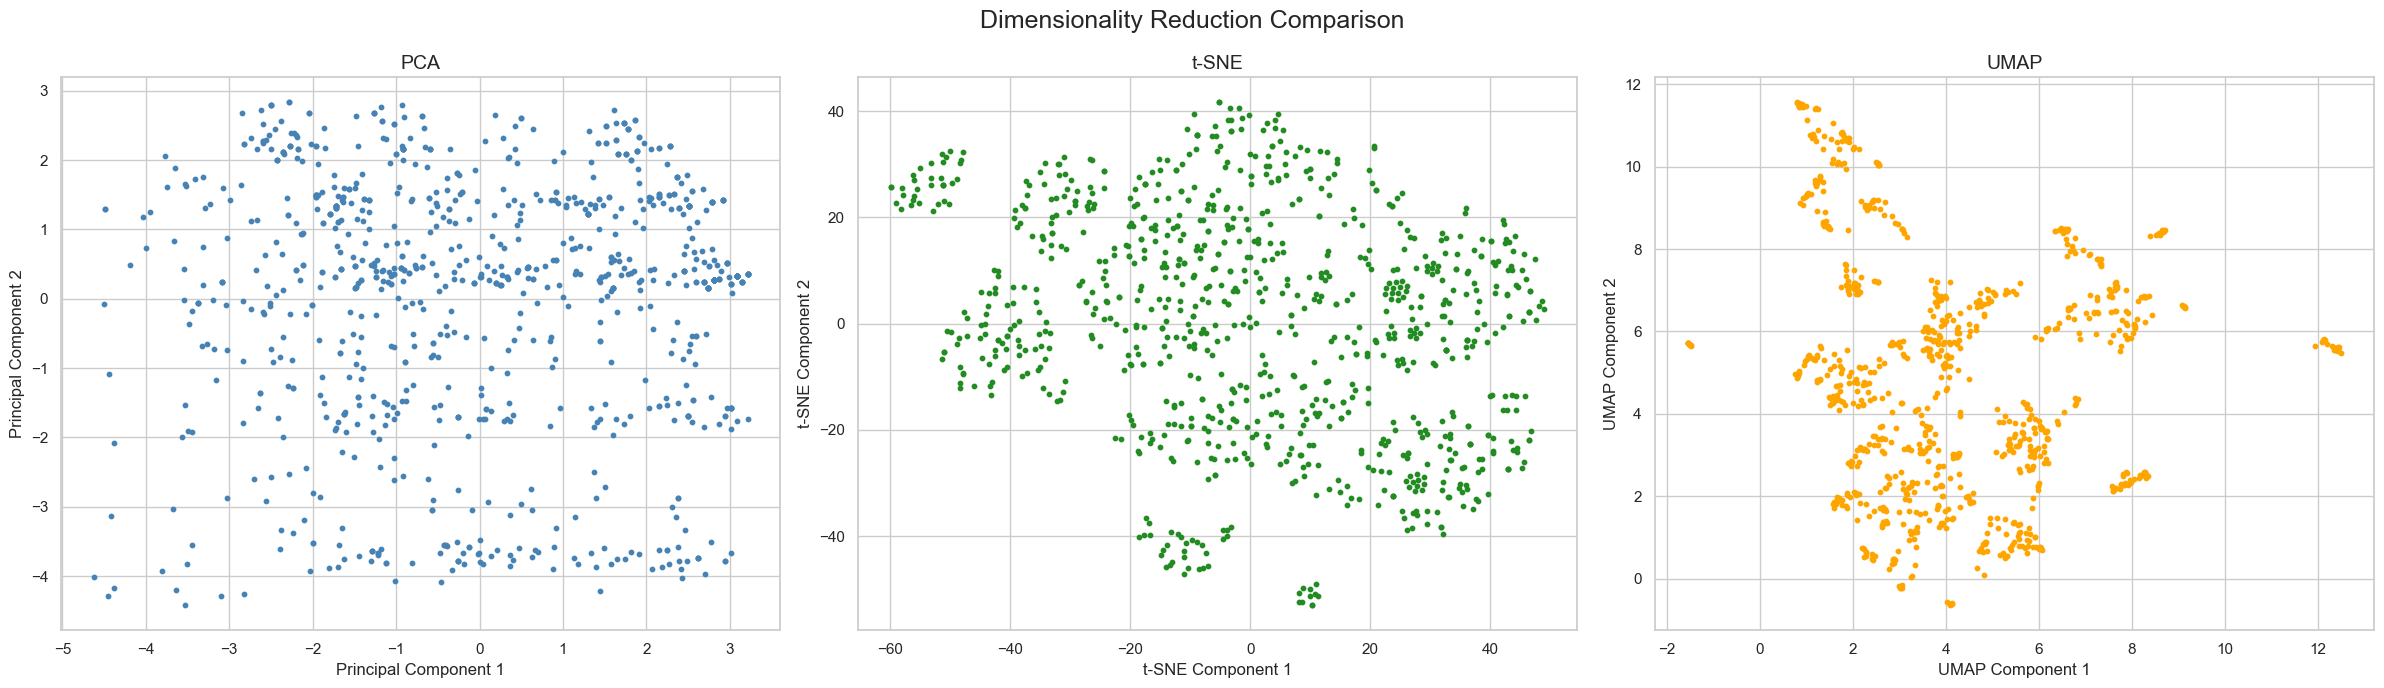

Graphs plotted successfully!


In [332]:
fig, ax = plt.subplots(1, 3, figsize=(24, 7))

print("Plotting the graphs...")

# PLotting PCA 
ax[0].scatter(X_pca[:, 0], X_pca[:, 1], s=10, c='steelblue')
ax[0].set_title('PCA', fontsize=14)
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Plotting t-SNE 
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=10, c='forestgreen')
ax[1].set_title('t-SNE', fontsize=14)
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')

# PLotting UMAP 
ax[2].scatter(X_umap[:, 0], X_umap[:, 1], s=10, c='orange')
ax[2].set_title('UMAP', fontsize=14)
ax[2].set_xlabel('UMAP Component 1')
ax[2].set_ylabel('UMAP Component 2')

plt.suptitle('Dimensionality Reduction Comparison', fontsize=18)
plt.tight_layout()
plt.show()

print("Graphs plotted successfully!")

From the reduced dimensions plots, we can infer that with UMAP we get the best clustering as the clusters are well defined and structured as compared to the other two

In [333]:
sil_scores = []
k_range = range(2, 11)

print("Printing silhouette scores for UMAP...\n")

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_umap)
    score = silhouette_score(X_umap, labels) 
    sil_scores.append([k, score])

    print(f"k = {k}: {score}")

best_k, best_score = max(sil_scores, key=lambda x: x[1])
print(f"\nHighest Silhouette Score is for k = {best_k}")


Printing silhouette scores for UMAP...

k = 2: 0.3764860928058624
k = 3: 0.43729132413864136
k = 4: 0.4502055048942566
k = 5: 0.4638317823410034
k = 6: 0.4835878908634186
k = 7: 0.457168310880661
k = 8: 0.458420068025589
k = 9: 0.4521365165710449
k = 10: 0.45789816975593567

Highest Silhouette Score is for k = 6


In [334]:
print(f"Applying clustering algorithms with k={best_k}...")

# K-Means Clustering
print("  Running K-Means...")
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_umap)

# Agglomerative Clustering
print("  Running Agglomerative Clustering...")
agg = AgglomerativeClustering(n_clusters=best_k)
agg_labels = agg.fit_predict(X_umap)

# DBSCAN Clustering
print("  Running DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_umap)

print("\nAll clustering algorithms completed!")

Applying clustering algorithms with k=6...
  Running K-Means...
  Running Agglomerative Clustering...
  Running DBSCAN...

All clustering algorithms completed!


In [335]:
print("Clustering Performance Evaluation:")
print("=" * 40)

# K-Means evaluation
kmeans_score = silhouette_score(X_umap, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")
print(f"K-Means Clusters: {len(np.unique(kmeans_labels))}")

# Agglomerative evaluation
agg_score = silhouette_score(X_umap, agg_labels)
print(f"Agglomerative Silhouette Score: {agg_score:.4f}")
print(f"Agglomerative Clusters: {len(np.unique(agg_labels))}")

# DBSCAN evaluation (excluding noise points)
dbscan_mask = dbscan_labels != -1  # Exclude noise points
if np.sum(dbscan_mask) > 0:
    dbscan_score = silhouette_score(X_umap[dbscan_mask], dbscan_labels[dbscan_mask])
    unique_dbscan = np.unique(dbscan_labels)
    n_clusters_dbscan = len(unique_dbscan[unique_dbscan != -1])
    n_noise = np.sum(dbscan_labels == -1)
    
    print(f"DBSCAN Silhouette Score: {dbscan_score:.4f}")
    print(f"DBSCAN Clusters: {n_clusters_dbscan}")
    print(f"DBSCAN Noise Points: {n_noise}")
else:
    print("DBSCAN: No valid clusters found")

print("\nK-Means shows the best performance and will be used for persona analysis")

Clustering Performance Evaluation:
K-Means Silhouette Score: 0.4836
K-Means Clusters: 6
Agglomerative Silhouette Score: 0.4619
Agglomerative Clusters: 6
DBSCAN Silhouette Score: 0.2192
DBSCAN Clusters: 13
DBSCAN Noise Points: 2

K-Means shows the best performance and will be used for persona analysis


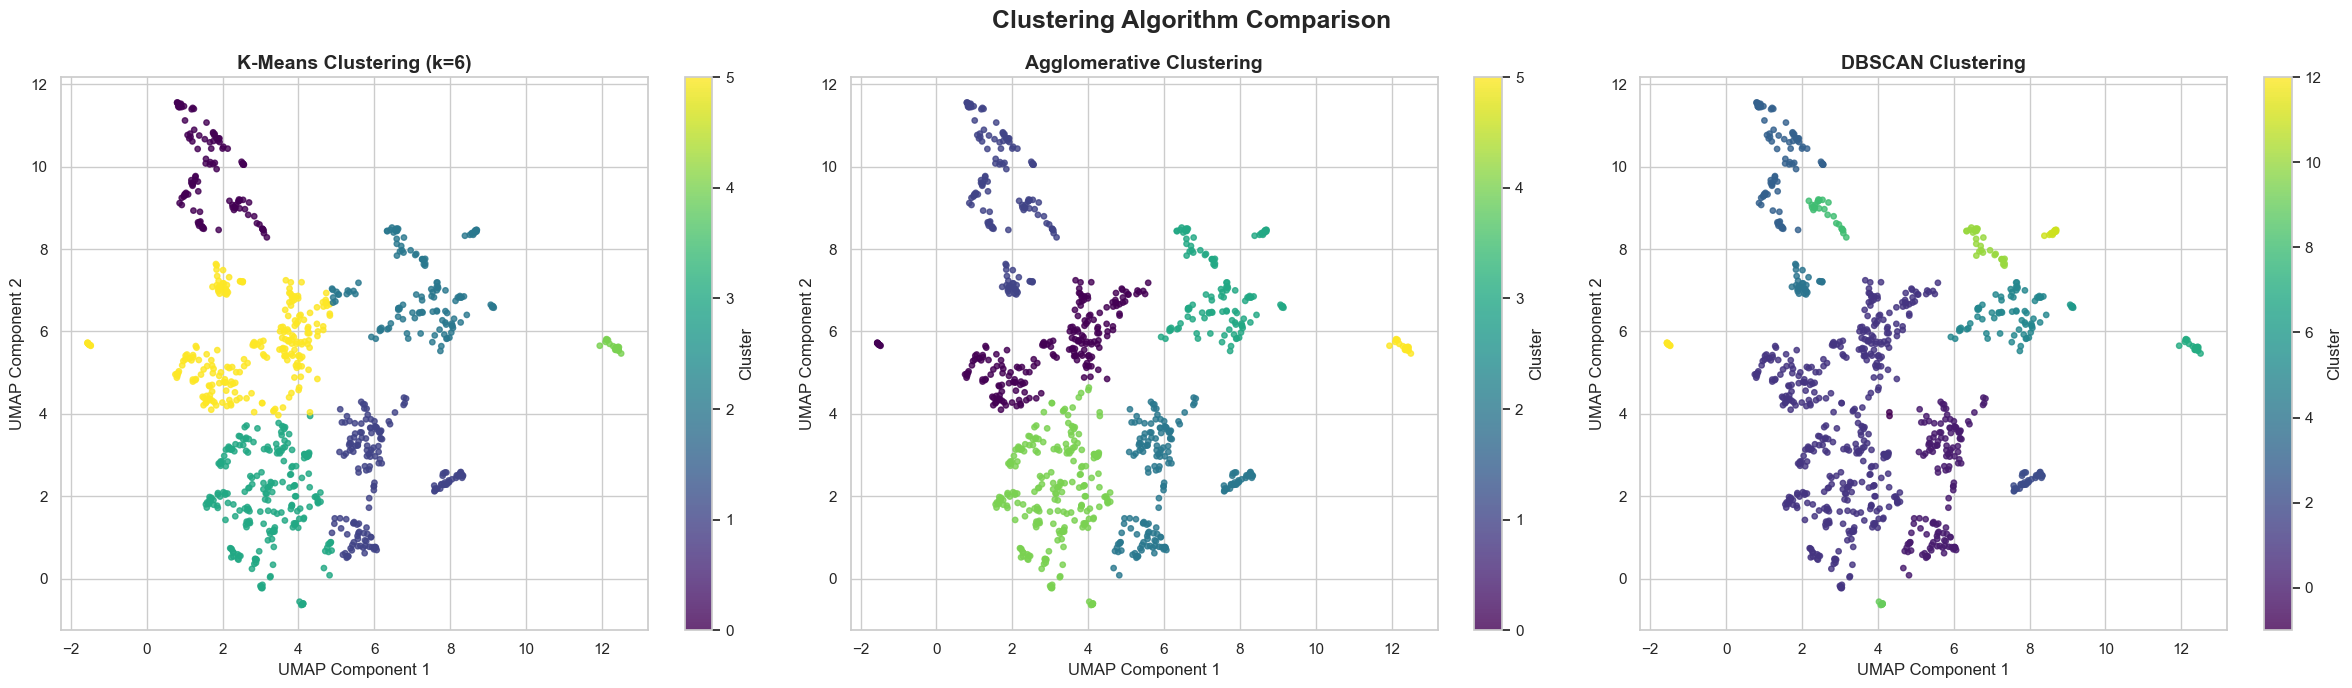

Clustering visualization completed!
Final recommendation: Use K-Means with 6 clusters for persona analysis


In [336]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7))

# K-Means Visualization
scatter1 = ax1.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, cmap='viridis', s=15, alpha=0.8)
ax1.set_title(f'K-Means Clustering (k={best_k})', fontsize=14, fontweight='bold')
ax1.set_xlabel('UMAP Component 1')
ax1.set_ylabel('UMAP Component 2')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Agglomerative Visualization
scatter2 = ax2.scatter(X_umap[:, 0], X_umap[:, 1], c=agg_labels, cmap='viridis', s=15, alpha=0.8)
ax2.set_title('Agglomerative Clustering', fontsize=14, fontweight='bold')
ax2.set_xlabel('UMAP Component 1')
ax2.set_ylabel('UMAP Component 2')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

# DBSCAN Visualization
scatter3 = ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=dbscan_labels, cmap='viridis', s=15, alpha=0.8)
ax3.set_title('DBSCAN Clustering', fontsize=14, fontweight='bold')
ax3.set_xlabel('UMAP Component 1')
ax3.set_ylabel('UMAP Component 2')
plt.colorbar(scatter3, ax=ax3, label='Cluster')

plt.suptitle('Clustering Algorithm Comparison', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("Clustering visualization completed!")
print(f"Final recommendation: Use K-Means with {best_k} clusters for persona analysis")

In [337]:
df_encoded['Cluster'] = kmeans_labels 
cluster_profiles = df_encoded.groupby('Cluster').mean().round(2)
cluster_profiles


,family_history_No,family_history_Yes,treatment_No,treatment_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,work_interfere_Unknown,remote_work_No,...,coworkers_Yes,supervisor_No,supervisor_Yes,obs_consequence_No,obs_consequence_Yes,age_group_15-25,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.88,0.12,0.91,0.09,1.00,0.00,0.00,0.00,0.00,0.72,...,0.93,0.11,0.89,0.92,0.08,0.10,0.67,0.23,0.00,0.00
1,0.43,0.57,0.22,0.78,0.02,0.43,0.12,0.37,0.06,0.63,...,0.87,0.28,0.72,0.41,0.59,0.18,0.54,0.27,0.01,0.00
2,0.86,0.14,1.00,0.00,0.00,0.00,0.00,0.04,0.96,0.62,...,0.87,0.21,0.79,0.99,0.01,0.29,0.50,0.21,0.00,0.00
3,0.45,0.55,0.19,0.81,0.00,0.05,0.00,0.94,0.00,0.67,...,0.99,0.24,0.76,1.00,0.00,0.17,0.64,0.19,0.00,0.00
4,0.89,0.11,0.96,0.04,0.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.04,0.96,1.00,0.00,0.00,1.00,0.00,0.00,0.00
5,0.58,0.42,0.39,0.61,0.14,0.06,0.43,0.30,0.07,0.68,...,0.47,0.53,0.47,0.95,0.05,0.15,0.49,0.19,0.13,0.05


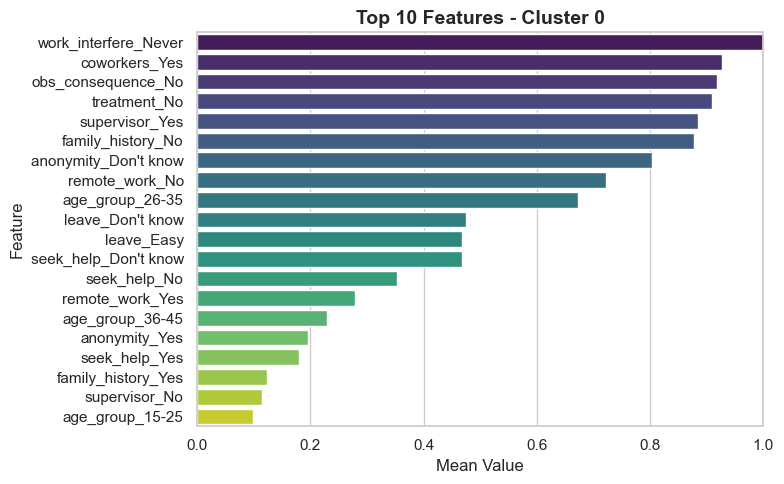

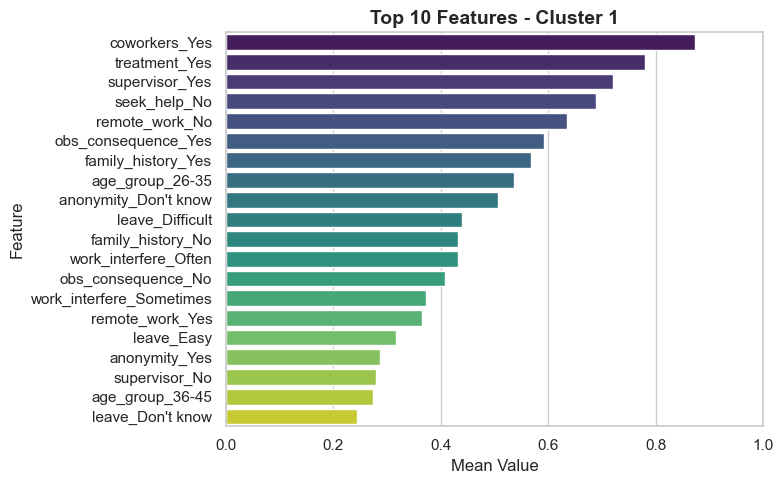

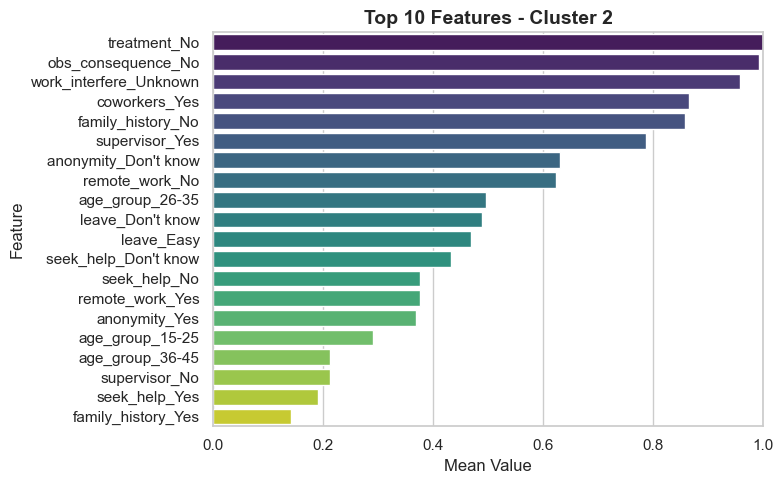

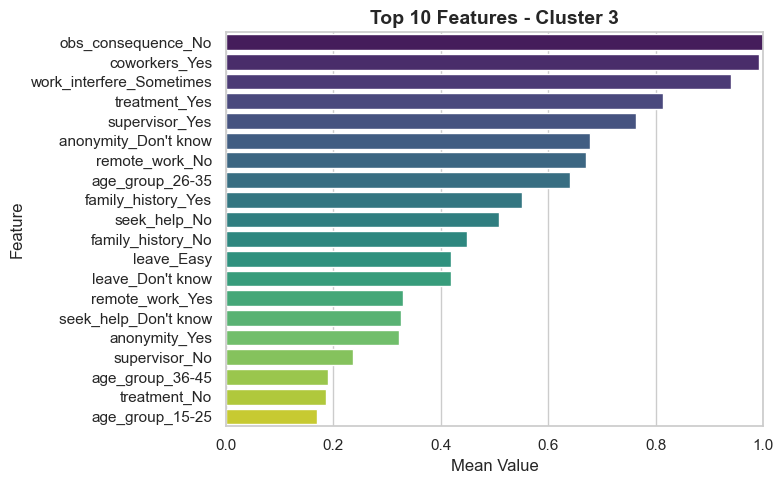

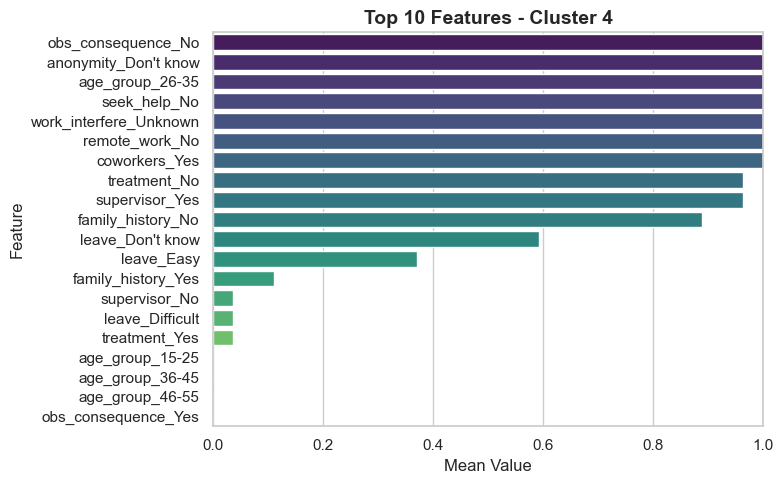

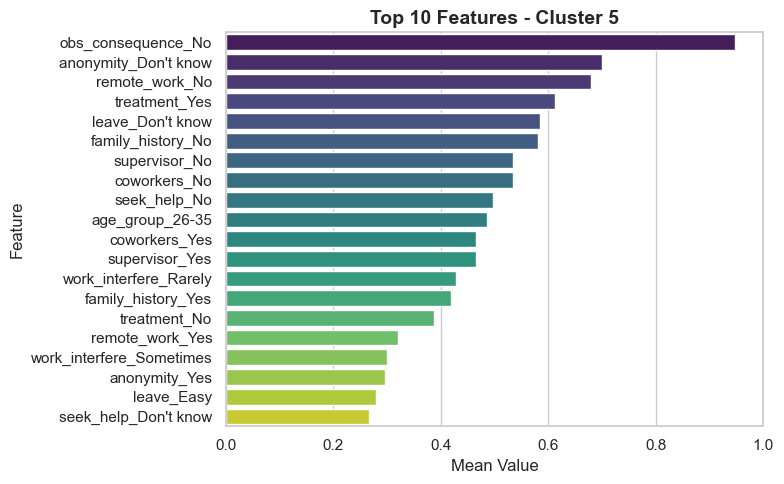

In [338]:
import seaborn as sns
num_features_to_show = 20

# Loop through clusters and plot
for cluster_label in sorted(df_encoded['Cluster'].unique()):
    cluster_data = df_encoded[df_encoded['Cluster'] == cluster_label]
    cluster_means = cluster_data.mean().drop('Cluster').sort_values(ascending=False)
    
    # Top N features
    top_features = cluster_means.head(num_features_to_show)
    
    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
    plt.title(f"Top 10 Features - Cluster {cluster_label}", fontsize=14, weight='bold')
    plt.xlabel("Mean Value", fontsize=12)
    plt.ylabel("Feature", fontsize=12)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

## Cluster 0: Stable but Unaware Support-Seekers

Mostly aged 26–35, this group feels mentally steady at work and is comfortable talking to coworkers and supervisors.  
However, they lack clarity around workplace policies like **mental health leave**, **anonymity**, and **support access**.  
They're socially supportive and open, but not actively engaged with mental health systems or formal resources.  
Their attitude is positive, but their actions show low involvement in structured support mechanisms.

---

## Cluster 1: Distressed but Expressive Fighters

These individuals are actively struggling — many receive treatment, face regular **work interference**, and find it hard to take leave.  
Still, they are emotionally open and communicate with supervisors and peers.  
There's a clear lack of awareness about workplace policies, and some might be receiving help not by choice, but through family or HR intervention.  
They are courageous and expressive, but often stuck in **rigid, unsupportive work environments**.

---

## Cluster 2: Detached Optimists

This group doesn’t feel affected by mental health concerns — or may not recognize them at all.  
They haven’t received treatment, don’t understand workplace mental health policies, and are unsure about seeking help.  
Their optimism may stem from **limited exposure**, **cultural silence**, or **low awareness**.  
While they’re somewhat socially open, they remain **uninformed and passive** when it comes to mental health.

---

## Cluster 3: Vocal Realists

These individuals acknowledge that mental health can interfere with work and many have sought treatment.  
They benefit from **supportive colleagues and supervisors**, encouraging open dialogue in the workplace.  
However, they’re still navigating uncertain ground around **anonymity**, **leave policies**, and formal procedures.  
They are mentally aware, confident, and gradually pushing for cultural shifts in workplace norms.

---

## Cluster 4: Detached Dismissers

This group largely **denies** mental health impacts at work and shows little interest in seeking help.  
They’re mostly unaware of leave or support policies and have rarely, if ever, received treatment.  
Although some receive **mild support** from peers, engagement with mental health systems is minimal.  
Predominantly younger professionals, they appear disconnected or indifferent to the broader mental health conversation.

---

## Cluster 5: Conflicted Strugglers

Many here have received treatment before, but currently hesitate to seek help — possibly due to burnout, skepticism, or distrust.  
They’re confused about policies like **anonymity** and **leave benefits**, and their workplace support is inconsistent.  
Some coworkers and supervisors are helpful, while others aren’t.  
This group is mentally aware but emotionally drained, cautious, and trying to find stable ground in a mixed support system.
